**Market Basket Analysis : Association**

Project Objective
The goal of this project is to analyze customer purchasing behavior using Market Basket Analysis. By identifying frequent itemsets and strong association rules among products, the project aims to uncover patterns of items that are commonly bought together. These insights can inform cross-selling strategies, product bundling, promotional campaigns, and store layout optimization, ultimately improving sales and enhancing the customer experience.

The Apriori algorithm is applied to discover frequent item combinations and generate association rules, measuring the strength of relationships between products using metrics such as support, confidence, and lift.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df = pd.read_csv("/content/Assignment-1_Data.csv",delimiter=";")
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.describe(include='all')

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
count,522064.0,520609,522064.000000,522064,522064,388023.000000,522064
unique,21665.0,4185,NaN,19641,1285,NaN,30
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31.10.2011 14:41,"1,25",NaN,United Kingdom
freq,1114.0,2269,NaN,1114,48778,NaN,487622
mean,NaN,NaN,10.090435,NaN,NaN,15316.931710,NaN
std,NaN,NaN,161.110525,NaN,NaN,1721.846964,NaN
min,NaN,NaN,-9600.000000,NaN,NaN,12346.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,13950.000000,NaN
50%,NaN,NaN,3.000000,NaN,NaN,15265.000000,NaN
75%,NaN,NaN,10.000000,NaN,NaN,16837.000000,NaN


In [ ]:
df.isnull().sum()

,0
BillNo,0
Itemname,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


In [ ]:
df.dropna(subset=['Itemname'],inplace=True)

Itemname contains 1455 missing values representing approximatively 0.28% of the data which is pretty low and can thus be removed.

In [ ]:
df['BillNo'].value_counts()

,count
BillNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
581487,1
536393,1
581566,1


In [ ]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7847
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
...,...
16144.0,1
13256.0,1
13120.0,1


In [ ]:
df[df['CustomerID'].isnull()].groupby('BillNo').size()

,0
BillNo,
536544,527
536555,2
536558,1
536565,2
536592,592
...,...
571931,261
571932,1
A563185,1


There are 2045 missing invoices (BillNo) that have missing CustomerID values. Some of these invoices are quite large, containing over 500 items, while most have only a few lines. This indicates that a significant number of transactions were recorded without an associated customer.

These missing values in CustomerID will be replaced with a placeholder value "Unknown" (or 0) to keep track of transactions without an associated customer.

In [ ]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [ ]:
df.duplicated().sum()

np.int64(5284)

In [ ]:
df = df.drop_duplicates()

II. Exploratory Data Analysis (EDA)
:

add Codeadd Markdown
The Price column was converted from a string with commas to a float, and the Date column was transformed into a proper datetime format (%d.%m.%Y %H:%M) to enable accurate time-based analysis.


In [ ]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)

In [ ]:
df['Date']=pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515325 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515325 non-null  object        
 1   Itemname    515325 non-null  object        
 2   Quantity    515325 non-null  int64         
 3   Date        515325 non-null  datetime64[ns]
 4   Price       515325 non-null  float64       
 5   CustomerID  515325 non-null  float64       
 6   Country     515325 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


In [ ]:
df['Itemname'].value_counts()

,count
Itemname,
WHITE HANGING HEART T-LIGHT HOLDER,2257
JUMBO BAG RED RETROSPOT,2084
REGENCY CAKESTAND 3 TIER,1921
PARTY BUNTING,1670
LUNCH BAG RED RETROSPOT,1558
...,...
temp adjustment,1
check?,1
missing?,1


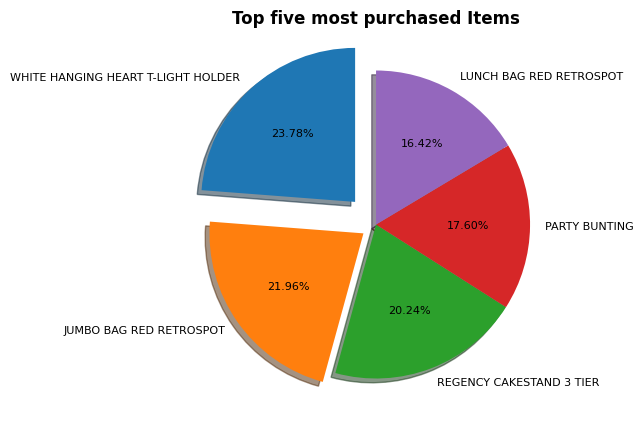

In [ ]:
plt.figure(figsize=(5,5))
top_five=df['Itemname'].value_counts().head(5)
plt.pie(top_five, labels=top_five.index,autopct='%1.2f%%',explode=(0.2,0.1,0,0,0),shadow=True,
        startangle=90,textprops={'fontsize': 8})
plt.title('Top five most purchased Items',weight='bold',fontsize=12)
plt.show()

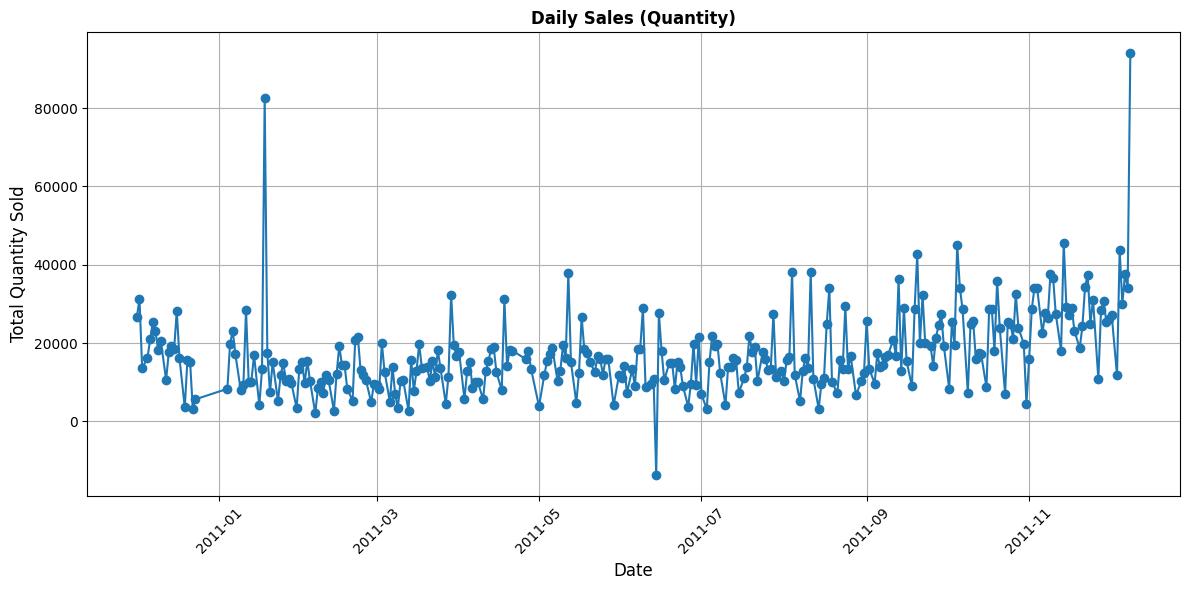

In [ ]:
daily_sales=df.groupby(df['Date'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Sales (Quantity)', fontsize=12, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
daily_sales[daily_sales == daily_sales.min()]

,Quantity
Date,
2011-06-14,-13656


The chart above shows daily sales quantities, including negative values. Negative quantities represent returns, corrections, or errors in recording transactions. These points highlight days where items were returned, marked incorrectly, or adjusted in the system, which explains unusually low or negative totals for certain dates. This distinction helps understand both actual sales and stock adjustments over time.

In [ ]:
loss=df[df['Quantity']<0]
loss

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
7122,537032,?,-30,2010-12-03 16:50:00,0.0,0.0,United Kingdom
12926,537425,check,-20,2010-12-06 15:35:00,0.0,0.0,United Kingdom
12927,537426,check,-35,2010-12-06 15:36:00,0.0,0.0,United Kingdom
12973,537432,damages,-43,2010-12-06 16:10:00,0.0,0.0,United Kingdom
20844,538072,faulty,-13,2010-12-09 14:10:00,0.0,0.0,United Kingdom
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,0.0,United Kingdom
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,0.0,United Kingdom
515637,581213,check,-30,2011-12-07 18:38:00,0.0,0.0,United Kingdom
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,0.0,United Kingdom


In [ ]:
loss_item=loss.groupby('Itemname')['Quantity'].sum()
loss_item

,Quantity
Itemname,
20713 wrongly marked,-200
?,-9496
? sold as sets?,-1200
??,-1849
?? missing,-170
...,...
wrongly coded-23343,-800
wrongly marked carton 22804,-256
wrongly marked. 23343 in box,-3100


The table summarizes items with negative quantities, representing returns, corrections, or recording errors. A total of 137 items were affected, with some having large negative quantities, indicating significant stock adjustments or misrecorded sales.


Only positive sales transactions are retained for the analysis, excluding returns, corrections, and errors, to ensure that the Apriori algorithm reflects actual purchasing behavior.

In [ ]:
df_sales = df[df['Quantity'] > 0].copy()

III. Data Modeling
1. Transaction Encoder:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

transactions= df_sales.groupby('BillNo')['Itemname'].apply(list).tolist()

te= TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
basket=pd.DataFrame(te_ary,columns=te.columns_)

basket

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
import seaborn as sns
basket.groupby('*Boombox Ipod Classic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
basket.groupby('*USB Office Mirror Ball').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
basket.groupby('10 COLOUR SPACEBOY PEN').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
basket.groupby('12 COLOURED PARTY BALLOONS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['*USB Office Mirror Ball'].value_counts()
    for x_label, grp in basket.groupby('*Boombox Ipod Classic')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('*Boombox Ipod Classic')
_ = plt.ylabel('*USB Office Mirror Ball')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['10 COLOUR SPACEBOY PEN'].value_counts()
    for x_label, grp in basket.groupby('*USB Office Mirror Ball')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('*USB Office Mirror Ball')
_ = plt.ylabel('10 COLOUR SPACEBOY PEN')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['12 COLOURED PARTY BALLOONS'].value_counts()
    for x_label, grp in basket.groupby('10 COLOUR SPACEBOY PEN')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('10 COLOUR SPACEBOY PEN')
_ = plt.ylabel('12 COLOURED PARTY BALLOONS')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['12 DAISY PEGS IN WOOD BOX'].value_counts()
    for x_label, grp in basket.groupby('12 COLOURED PARTY BALLOONS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('12 COLOURED PARTY BALLOONS')
_ = plt.ylabel('12 DAISY PEGS IN WOOD BOX')

2. Apriori algorithm:

Using the Apriori algorithm, we identify frequent itemsets — groups of products that are often purchased together. The min_support parameter determines the minimum frequency threshold for an itemset to be considered significant.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

transactions= df_sales.groupby('BillNo')['Itemname'].apply(list).tolist()

te= TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
basket=pd.DataFrame(te_ary,columns=te.columns_)

from mlxtend.frequent_patterns import apriori, association_rules

frequent_items=apriori(basket,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

frequent_items.sort_values(by='support', ascending=False).head()

,support,itemsets
121,0.111567,(WHITE HANGING HEART T-LIGHT HOLDER)
49,0.104575,(JUMBO BAG RED RETROSPOT)
96,0.096469,(REGENCY CAKESTAND 3 TIER)
81,0.083903,(PARTY BUNTING)
66,0.078077,(LUNCH BAG RED RETROSPOT)


In [ ]:
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037290,0.049400,0.030653,0.822011,16.640029,1.0,0.028811,5.340778,0.976311,0.547016,0.812761,0.721262
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049400,0.037290,0.030653,0.620513,16.640029,1.0,0.028811,2.536870,0.988748,0.547016,0.605813,0.721262
5,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051325,0.049400,0.037037,0.721619,14.607788,1.0,0.034502,3.414745,0.981941,0.581543,0.707152,0.735681
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.049400,0.051325,0.037037,0.749744,14.607788,1.0,0.034502,3.790812,0.979953,0.581543,0.736204,0.735681
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048994,0.052034,0.032072,0.654602,12.580211,1.0,0.029522,2.744560,0.967933,0.465099,0.635643,0.635480
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.052034,0.048994,0.032072,0.616358,12.580211,1.0,0.029522,2.478891,0.971037,0.465099,0.596594,0.635480
15,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.054365,0.078077,0.030045,0.552656,7.078373,1.0,0.025800,2.060883,0.908093,0.293419,0.514771,0.468736
14,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.078077,0.054365,0.030045,0.384815,7.078373,1.0,0.025800,1.537156,0.931449,0.293419,0.349448,0.468736
7,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.104575,0.061357,0.041496,0.396802,6.467124,1.0,0.035079,1.556112,0.944101,0.333469,0.357373,0.536551
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061357,0.104575,0.041496,0.676301,6.467124,1.0,0.035079,2.766223,0.900632,0.333469,0.638496,0.536551


The association rules reveal strong relationships between similar or complementary products. For instance, customers who buy the Green Regency Teacup and Saucer are highly likely to also purchase the Pink Regency Teacup and Saucer, with a lift of 16.64 — indicating a very strong positive association. Similarly, color variants such as the Alarm Clock Bakelike Green and Red or the Jumbo Bag Red Retrospot and Pink Polkadot show strong co-purchasing patterns, suggesting that customers often buy multiple styles of the same item.

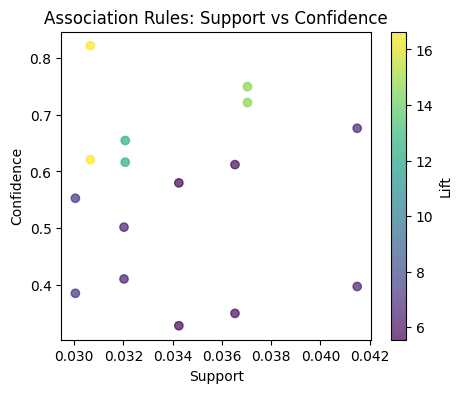

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(rules['support'], rules['confidence'],
            c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

IV. Conclusion :


The analysis identified frequent itemsets and strong association rules among products. Rules with high lift and confidence reveal which items are commonly bought together, providing actionable insights for cross-selling, promotional strategies, and product placement. Rare but confident rules may also indicate niche opportunities. Overall, this market basket analysis highlights patterns that can optimize sales and customer experience.